4장

04-1 초기 인공지능 알고리즘과 로지스틱 회귀

이진 분류는 True(1) / False(0 or -1) 로 구분하는 문제 -> 계단형으로 그래프 형성

퍼셉트론 (Perceptron): 1957년 프랑크 로제네블라트가 발표

여러 개의 특성을 표현하는 방법 -> z=w1x1+w2x2+b 와 같이 나열

아달린 (Adalune) -> 역방향 계산을 통해서 계단 함수를 돌출

로지스틱 회귀 란 분류 알고리즘이며, z 값을 활성화 함수 -> 역방향 계산 -> 임계함수 (계단형) 등을 통하여 y_hat을 돌출

04-2 시그모이드 함수로 확률을 만듭니다

04-3 로지스틱 손실 함수를 경사 하강법에 적용

분류의 정확도는 미분 가능한 함수가 아닙니다.

대신 이진 크로스 엔트로피 또는 로지스틱 손실 함수를 사용합니다.

미분의 연쇄법칙

check point 겉미속미 하는 것을 잊지 말 것!

공식에 대한 증명 진행




4장 4~5절 로지스틱 회귀를 위한 뉴런을 만듭니다.
- 이진 분류

04-4 분류용 데이터 세트를 준비합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

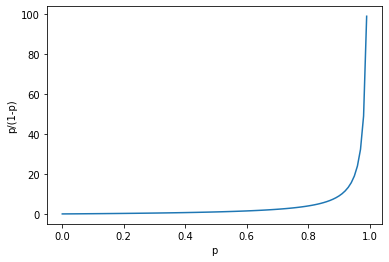

In [2]:
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

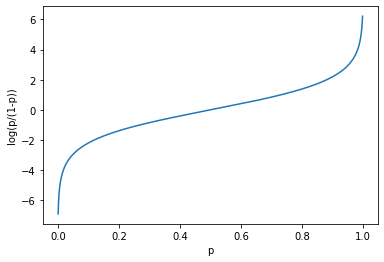

In [3]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

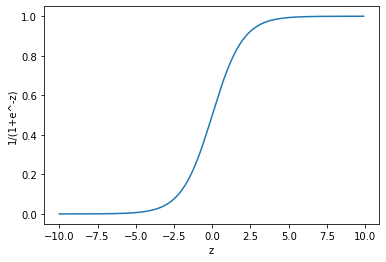

In [4]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [6]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [7]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

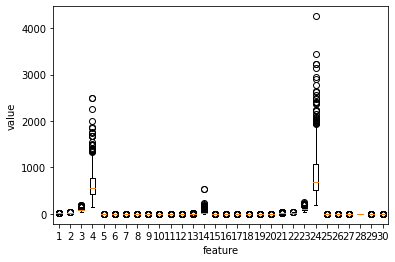

In [8]:
# 박스 플롯(상자 수염 그래프) 그려서 데이터 파악하기

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [10]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [11]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [12]:
x = cancer.data
y = cancer.target

## 04-5 로지스틱 회귀로 모델을 만들어봅니다

일반화 성능을 평가하기 위한 룬련세트와 테스트 세트로 나눕니다.

훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙

. 훈련 데이터 세트를 나눌 떄는 테스트 세트 보다 훈련 세트가 더 많아야 합니다.

. 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나
  테스트 세트의 어느 한 쪽에 몰리지 않도록 골고루 섞어야 합니다.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [32]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [34]:
# 로지스틱 뉴런 구현하기

class LogisticNeuron:   # Neuron 클래스와 비슷
    
    def __init__(self):   # 가중치와 절편을 미리 초기화 하지 않습니다.
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

        # a = np.array([1, 2, 3])
        # b = np.array([3, 4, 5]) 
        # print(a + b)
        # array([4, 6, 8])
        # print (a * b)
        # array([3, 8, 15])
        # np.sum(a * b)
        # 26

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0                        # 절편을 초기화합니다.
        for i in range(epochs):           # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)    # 활성화 함수 적용
                err = -(y_i - a)          # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산   -> x = [1, 2, 3] 를 x_i 로 치환을 해서 forpass 함수에 넣어서 나온 값이 z의 값으로 나오도록 진행
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5                          # 께단 함수 적용 - > a 의 값이 0.5 보다 크면 true, a 의 값이 0.5 보다 작으면 false가 나오도록 구현 ex. [0.1, 0.3, 0.7] -> [F, F, T]

In [25]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_train) == y_test)

NameError: ignored

In [35]:
a = np.array([1,2,3])
b = np.array([3,4,5])

In [36]:
a + b

array([4, 6, 8])

In [37]:
a * b

array([ 3,  8, 15])

In [38]:
np.sum(a * b)

26

In [39]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
np.full((2,3), 7)

array([[7, 7, 7],
       [7, 7, 7]])

In [41]:
np.c_[np.zeros((2,3)), np.ones((2,3))]

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [42]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [44]:
np.mean(neuron.predict(x_test) == y_test) # x_test의 값이 결과값만큼 일치 함을 예측하게 해준다.

0.8245614035087719

##04-6 로지스틱 회귀 뉴런으로 단일층 신경망을 만들어 봅니다

일반적으로 신경망이 구축 되는 단계로는

입력층, 은닉층, 출력층으로 구성되어 있으며

입력층은 입력 데이터 layer 를 의미하며
은닉층은 딥러닝 신층 신경망을 의미하고 시그모이드 (활성화 함수) 와 함께 구현합니다.

은닉층이 없는 신경망을 로지스틱 회귀 뉴런이라라고 합니다.

위의 신경망은, 입력층 (w1x1, w2x2, b) , 출력층 (z, 활성화 함수, 입력 함수) 로 구성 되어 있습니다.

In [51]:
# 손실 함수 결과값 저장 기능 추가하기

class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    # 에포크마다 훈련 샘플 섞기

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞습니다
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

## 여러가지 경사 하강법

### 확률적 경사 하강법
- 1개의 샘플을 중복되지 않도록 무작위로 선택 -> 그레이디언트 계산

### 미니 배치 경사 하강법 (위 와 아래의 중간)
- 전체 샘플 중 몇 개의 샘플을 중복되지 않도록 -> 그레이디언트 계산

### 배치 경사 하강법
- 전체 샘플을 모두 선택 -> 그레이디언트 계산

In [ ]:
 def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용 -> a > 0.5 양 / < 0.5 음 -> z > 0 / < 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [52]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

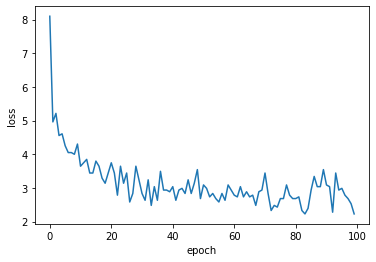

In [53]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 04-7 사이킷런의 경사 하강법을 사용해 봅니다

In [54]:
from sklearn.linear_model import SGDClassifier

In [55]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42) # 회귀는 SGDRegressor로 하고 'log' 는 로지스틱 손실 함수를 지정함을 의미합니다.
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [56]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])